# Problem 1

## (a) Uniform Sampling

The integral is $\int_0^\pi \sin x \, dx$.  We will not need any weighting function for uniform sampling.

The integral is given by 
$$\int_{a}^{b} \ dx \  f(x) \simeq
(b-a)\frac{1}{N} \sum_{i=1}^{N} f(x_{i}) = (b-a) \langle f
\rangle$$
and the error estimate is given by $\sigma_I$, where
$$\begin{align}
\sigma_I^2 &\simeq \frac{1}{N} \sigma_f^2 \\
&= \frac{1}{N} \left[ \frac{1}{N} \sum_{i=1}^N f_i^2 - \left( \frac{1}{N} \sum_{i=1}^N f_i \right)^2 \right]
\end{align}$$

In [9]:
import numpy as np
import random
def f(x):
    return np.sin(x)

N = 10000
sum = 0.
sum2 = 0.
a = 0.
b = np.pi
for i in range(N):
    x = random.uniform(a, b)
    sum += f(x)
    sum2 += pow(f(x),2)
result = (b-a)*sum/N
sigma = np.sqrt((sum2/N - pow(sum/N,2))/N)
print("For N=", N, ": ", result, "+/-", sigma)


For N= 10000 :  2.000031007540767 +/- 0.003075811829597269


This agrees with the exact value of 2.0, within error.

## (b) Uncertainty with Uniform Sampling

The uncertainty is plotted as a function of $N$, the number of points used in the MC integration.  A log-log scale is used to highlight the exponential form.

N=100, sigma=2.91e-02
N=1000, sigma=9.97e-03
N=10000, sigma=3.10e-03
N=100000, sigma=9.75e-04
N=1000000, sigma=3.08e-04


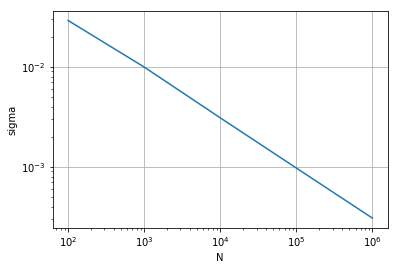

Slope is  -0.49618934684011456


In [17]:
import matplotlib.pyplot as plt
N_values = []
sigma_values = []
for p in range(2,7):
    N = pow(10., p)
    sum = 0.
    sum2 = 0.
    for i in range(int(N)):
        x = random.uniform(a, b)
        sum += f(x)
        sum2 += pow(f(x),2)
    sigma = np.sqrt((sum2/N - pow(sum/N,2))/N)
    print("N=%d, sigma=%.2e" % (N, sigma))
    N_values.append(N)
    sigma_values.append(sigma)

plt.plot(N_values, sigma_values)
plt.xscale('log')
plt.xlabel('N')
plt.yscale('log')
plt.ylabel('sigma')
plt.grid()
plt.show()

print("Slope is ", np.polyfit(np.log(N_values), np.log(sigma_values),1)[0])

The plot shows that $\log \sigma = a \log N$, with a slope $a=-0.50$.  This means that $\sigma \sim N^{-1/2}$, as expected for the MC integration.

## (c) Importance Sampling

To prepare the importance sampling, we choose a weighting function that matches $f(x)=\sin(x)$:
$$\begin{align}
w(x) &= \frac{4}{\pi^2} x (\pi -x)\\
&= \frac{4}{\pi^2} (\pi x - x^2)
\end{align}$$
Then the cumulative probability function is 
$$\begin{align}
y(x) &= \int_0^x w(x')\, dx' \\
&= \frac{4}{\pi^2}\left[ \frac{\pi}{2}x^2 - \frac{1}{3}x^3 \right]_0^x \\
& = \frac{2}{\pi}x^2 - \frac{4}{3\pi^2}x^3 
\end{align}
$$

We can see that this weighting function is not normalized: $y(\pi)=2\pi - \frac{4}{3}\pi = \frac{2}{3}\pi$ instead of 1.
We need to multiply the weighting function by $\frac{3}{2\pi}$, so that the normalized weighting function is
$$w(x) = \frac{6}{\pi^3} (\pi x -x^2)$$

The cumulative probability function is
$$\begin{align}
y(x) &= \frac{6}{\pi^3} \int_0^x (\pi x' -x'^2) dx'\\
&= \frac{3}{\pi^2} x^2 - \frac{2}{\pi^3} x^3
\end{align}$$

This relation for $y(x)$ can be inverted to find $xx(y)$, but just barely.  
WolframAlpha gives [three possible inversions](http://www.wolframalpha.com/input/?i=solve+y+-+3%2Fpi**2+x**2+%2B+2%2Fpi**3+x**3+%3D0+for+x), but only one of them works in our domain $y \in [0,1]$.
It should give $xx(0) = 0$ and $xx(1) = \pi$, obviously.

The algebraic form of the correct inversion is 
$$xx(y) = \frac{\pi}{4} 
\left(
-(1+i\sqrt{3}) \sqrt[3]{-2y + 2\sqrt{(y-1)y} + 1} 
+\frac{-1+i\sqrt{3}}{\sqrt[3]{-2y + 2\sqrt{(y-1)y} + 1}}
+2
\right)$$
This is the function that goes in to transform a uniform distribution in $y$ to an importance-weighted distribution in $xx$.
To deal with the imaginary factors, we have to use to `cmath` Python package.
The imaginary parts vanish in the final result, but you might still see tiny imaginary values due to limited numeric precision.
We use the `.real` function to drop them, but this causes some modest warnings from Python.

/Users/nielsenj/anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


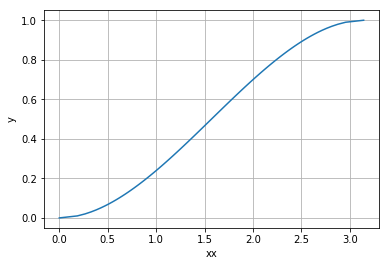

For N= 1000 :  (2.0039172931818907-1.3599311427327523e-18j) +/- (0.0029886683177952392-3.35487797185947e-20j)
For N= 1000 :  2.0039172931818907 +/- 0.0029886683177952392


/Users/nielsenj/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:786: ComplexWarning: Casting complex values to real discards the imaginary part
  tmp_a_data = tmp_a.astype(float)
/Users/nielsenj/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:792: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = tmp_a.astype(np.intp)
/Users/nielsenj/anaconda/lib/python3.5/site-packages/matplotlib/transforms.py:841: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
/Users/nielsenj/anaconda/lib/python3.5/site-packages/matplotlib/transforms.py:2059: ComplexWarning: Casting complex values to real discards the imaginary part
  x, y = float(x), float(y)


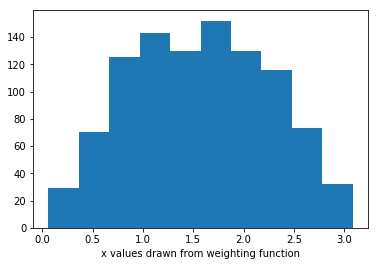

In [24]:
# Monte Carlo integration with uniform sampling and importance sampling
from pylab import *
import cmath

# Interval of integration is [0,pi] in x
def f(x):
    return sin(x)

def w(x):
    return 6./pow(pi,3) * x * (pi - x)

def xx(y):
    square_root = cmath.sqrt((y-1.)*y)
    cube_root = exp(1./3. * log(-2.*y + 2.*square_root + 1.))
    sum_of_terms = 1j*(-sqrt(3)+1j)*cube_root - (1-1j*sqrt(3))/cube_root + 2.
    return sum_of_terms*pi/4

# This block saves xx(y) as y vs. xx
# Note that the correct inversion function is single-valued over the interval
test_x_values = []
test_y_values = np.linspace(0,1,100)
for y in test_y_values:
    test_x_values.append(xx(y))
plt.plot(test_x_values, test_y_values)
plt.grid()
plt.xlabel("xx")
plt.ylabel("y")
plt.show()

x_values = []
# Importance sampling
N = 1000
a = 0.
b = pi
sum = 0.
sum2 = 0.
for i in range(N):
    y = random()
    x = xx(y)
    x_values.append(x)
    integrand = f(x)/w(x)
    sum += integrand
    sum2 += pow(integrand,2)
result = sum/N
sigma = sqrt((sum2/N - pow(sum/N,2))/N)
print("For N=", N, ": ", result, "+/-", sigma)
print("For N=", N, ": ", result.real, "+/-", sigma.real)

plt.figure()
plt.hist(x_values)
plt.xlabel('x values drawn from weighting function')
plt.show()

The $x$ values shown in the histogram do follow the form of the weighting function $w$.  This is a good check that the inversion and random importance sampling are working correctly.

## (d) Uncertainty for Importance Sampling

The formula for importance sampling is the same as for uniform sampling, except this time we calculate the variance of the integrand $f(x)/w(x)$.  We expect that the uncertainty will be less than for uniform sampling of $f(x)$, simply because the variance of the integrand $f/w$ is less, by design.

Because the weighting function $w(x)$ is not exactly the same as $f(x)$, there will be a variance in the integrand and an error in the numerical estimate of the integral.

For N= 10 :  1.9644308003866415 +/- 0.029944351136650282
For N= 100 :  1.994119476362426 +/- 0.010299148141283179
For N= 1000 :  1.997347214305329 +/- 0.0031310395303232813
For N= 10000 :  1.998189698112974 +/- 0.0010061437689610896
For N= 100000 :  1.9996832757708467 +/- 0.0003135662031066361
For N= 1000000 :  2.0000020154085565 +/- 9.892554933724517e-05


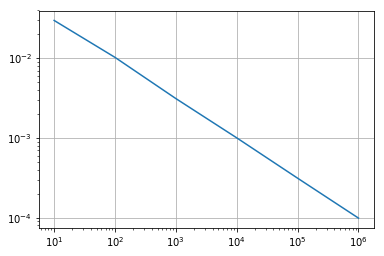

Slope = -0.49849933894484816


In [28]:
def integrate1(N):
    sum = 0.
    sum2 = 0.
    for i in range(N):
        y = random()
        x = xx(y)
        integrand = f(x)/w(x)
        sum += integrand
        sum2 += pow(integrand,2)
    result = sum/N
    sigma = sqrt((sum2/N - pow(sum/N,2))/N)
    #print("For N=", N, ": ", result.real, "+/-", sigma.real)
    return (result, sigma)

N_values = []
sigma_values = []
for N in logspace(1, 6, 6, dtype=int):
    (result, sigma) = integrate1(N)
    print("For N=", N, ": ", result.real, "+/-", sigma.real)
    N_values.append(N)
    sigma_values.append(sigma.real)
plt.plot(N_values, sigma_values)
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.show()

print("Slope =", polyfit(log(N_values), log(sigma_values),1)[0])

The plot shows that $\log \sigma = a \log N$, with a slope $a=-0.50$.  This means that $\sigma$ still changes as $\sigma \sim N^{-1/2}$, typical of all 1-D Monte Carlo integration, but the absolute error is smaller than in part (b), even for the exact same integral.

In part (b), $N=10^6$ gave an error of 3.08e-04, but now $N=10^6$ gives an error of 9.9e-05.  This is a direct result of having reduced the variance in the integrand.

# Problem 2
Use the von Neumann (acceptance/rejection) method to estimate the following integrals numerically, including uncertainties. (Each of these integrals presents a new wrinkle in the calculation.)

(a) $\int_{1}^{2} x^2 dx$  
(b) $4 \int_{0}^{1} \sqrt{1-x^2} dx$  
(c) $\int_{0}^{2} \left( 4 - x^2 \right)^{1/2} dx$

## (a) $\int_{1}^{2} x^2 dx$  

I will base the weighting function on the function itself and use $x^2$. 
However, I need to normalize $w(x)$ so that it has an area of 1 when integrated over the region of interest.  
$$\int_{1}^{2} x^2 dx = \frac{1}{3} x^3 \big|_{1}^{2} = \frac{1}{3} (8 - 1) = \frac{7}{3}$$ 

My normalized weighting function is now $w(x) = \frac{3}{7} x^2$.  
The purpose of the acceptance/rejection method is to generate points with this probability distribution.
First, let's develop a method to generate those points.

In [29]:
import numpy as np 
import matplotlib.pylab as plt

# I define a function to generate points with an arbitrary weighting function. 
# "Function" is my weight function
# "x_min" is the minimum x value
# "x_max" is the maximum x value
# "y_max" is the maximum y value of our function
# "N" is the desired number of points
def generator(function, x_min, x_max, y_min, y_max, N): 
    
    # Appending to arrays is slow. I create empty arrays, and assign the values as I go
    points_x = np.empty(N)
    points_y = np.empty(N)
    
    # Keep track of how many points I have accepted. 
    accepted = 0
    
    while accepted < N: 
        
        # Generate random x and y values
        # Uniform is inclusive on the first element, and excusive on the second. 
        # To cover my full range, I increase the upper bound by the smallest amount possible. 
        test_x = np.random.uniform(x_min, np.nextafter(x_max, x_max+1))
        test_y = np.random.uniform(y_min, np.nextafter(y_max, y_max+1))
        
        # Check if my random values "fit" my chosen probability distribution
        if test_y <= weight(test_x): 
            points_x[accepted] = test_x
            points_y[accepted] = test_y
            accepted += 1
            
    return points_x, points_y


At this point, it would be good to check that our weight function and distribution generator is working as expected. 

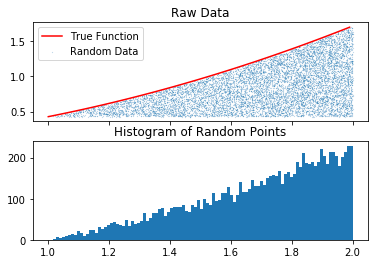

In [30]:
# Define weighting function w(x)
weight = lambda x: (3/7) * x**2

x, y = generator(weight, 1, 2, weight(1), weight(2), 10000)

f, ax = plt.subplots(2, sharex = True)
ax[0].plot(np.arange(1, 2, 0.01), weight(np.arange(1, 2, 0.01)), 'r', label = 'True Function')
ax[0].scatter(x, y, s = 0.01, label = 'Random Data')
ax[0].legend()
ax[0].set_title('Raw Data')
ax[1].hist(x, 100)
ax[1].set_title('Histogram of Random Points')
plt.show()


This looks good! We can see that all points have x values between our minimum and maximum, and y values ranging from 0 to $x^2$. Examining the histogram, we can see that we have more accepted points where our weight function has a greater value. However, the histogram is not perfectly smooth, which reflects the random nature of this technique.   
  
Now, let's work on the actual integration. 

In [31]:
# Carry out the integral 
def integral (function, weight, x_min, x_max, y_min, y_max, N): 
    # Generate x_data points 
    x_data, unused_y_data = generator(weight, x_min, x_max, y_min, y_max, N)

    # Find the area and uncertainty
    area = np.sum(function(x_data)/weight(x_data))/N
    sum2 = np.sum(((function(x_data)/weight(x_data)))**2)
    
    sigma = np.sqrt(abs(sum2/N - pow(area,2))/N)
    
    return area, sigma


My methods are now complete. To verify them, try doing the example in Lecture 6.

In [32]:
function = lambda x: 1/(1 + x**2)
weight = lambda x: (4-2*x)/3
N = 20
area, uncertainty = integral(function, weight, x_min = 0, x_max = 1, y_min = 0, y_max = 1, N = N)

print("For N =", N, ": ", area, "+/-", uncertainty)

For N = 20 :  0.7844170436466414 +/- 0.004447656735716686


This looks good!  (The exact answer is $\pi/4 = 0.7854$.) Let's move onto the analysis. 

In [33]:
function = lambda x: x**2
weight = lambda x: (3/7) * x**2

N = 1
area, uncertainty = integral(function, weight, x_min=1, x_max=2, y_min=0, y_max = 4, N = N)
print("For N =", N, ": ", area, "+/-", uncertainty)

N=100
area, uncertainty = integral(function, weight, x_min=1, x_max=2, y_min=0, y_max = 4, N = N)
print("For N =", N, ": ", area, "+/-", uncertainty)

For N = 1 :  2.3333333333333335 +/- 0.0
For N = 100 :  2.3333333333333335 +/- 2.9802322387695314e-09


This is exactly the answer we want!  (The exact answer is $7/3 =2.333$, as we saw above in the normalization.) Using the weight function as the actual function has some interesting results. Namely, we get the same answer whether we have $N=100$ or $N=1$, with only one function evaluation, and got the correct answer with essentially uncertainty.  (The small uncertainty printed comes from numerical precision in the difference when calculating the variance.) Let's look at why this method works so well.  
  
Our actual function is $f(x)=x^2$, and our weight function is $w(x)=\frac{3}{7} x^2$.  
The formula for this method of integration is $$\int_{a}^{b} f(x) \, dx \approx \frac{1}{N} \sum_{i = 1}^{N} \frac{f(x)}{w(x)} \Rightarrow \frac{1}{N} \sum_{i = 1}^{N} \frac{x^2}{\frac{3}{7} x^2} = \frac{1}{N} \sum_{i = 1}^{N} \frac{7}{3} = \frac{7}{3}$$   

In normalizing the weight function, we calculated the integral exactly. 
Because the weight function $w(x)$ has exactly the same behavior as the original function $f(x)$, the new integrand $f(x)/w(x)$ is a constant factor, with 0 variance.

Therefore our numerical integral is exact. 

## (b) $4 \int_{0}^{1} \sqrt{1-x^2} dx$  

For the weight function, we will use a polynomial that has the same behavior as the integrand at the endpoints.
$$w(x) = 1-x^2$$

After normalizing, I get:  
$$w(x) = \frac{3}{2}(1-x^2)$$

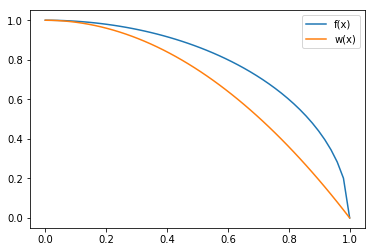

In [34]:
x_values = np.linspace(0,1,50)
plt.plot(x_values, np.sqrt(1.-pow(x_values,2)), label="f(x)")
plt.plot(x_values, 1-pow(x_values,2), label="w(x)")
plt.legend()
plt.show()

In [42]:
function = lambda x:4 * np.sqrt(1 - x**2)
weight = lambda x: 3./2. * (1-pow(x,2))
N = 1000
area, uncertainty = integral(function, weight, x_min = 0, x_max = 1, y_min = weight(1), y_max = weight(0), N = N)

print("For N =", N, ": ", area, "+/-", uncertainty)

For N = 1000 :  3.1363193286958886 +/- 0.02410515826470092


The exact answer is $\pi \approx 3.1416$.

## (c) $\int_{0}^{2} \left( 4 - x^2 \right)^{1/2} dx$  

I choose my weight function to be $w(x) = 4 -x^2$ (before normalization).  This has appropriate behavior at the endpoints.  It is always good to check the behavior by making a plot.  I use the normalized version for the plot: $w(x) = \frac{3}{16} 4 -x^2$.

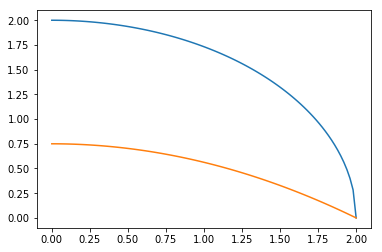

In [48]:
function = lambda x: sqrt(4-x**2)
weight = lambda x: 3/16 * (4-x**2)

xvalues = linspace(0,2,100)
fvalues = function(xvalues)
wvalues = weight(xvalues)

plt.figure()
plt.plot(xvalues, fvalues)
plt.plot(xvalues, wvalues)
plt.show()

This looks reasonable, so now we can run the integration.

In [49]:

N = 10000
area, uncertainty = integral(function, weight, x_min = 0, x_max = 2, y_min = 0, y_max = 4, N = N)

print("For N =", N, ": ", area, "+/-", uncertainty)

For N = 10000 :  3.125962981964855 +/- 0.009076340229294528


The exact answer here is also $\pi \approx 3.1416$.

# Problem 3

## (a) Probability for Neutron to Penetrate Shielding
The probability for the neutron to scatter at some angle $\theta$ is independent of $\theta$.  
This means that we can assume a uniform probability distribution for $\theta$ in the interval $[0,\pi]$ (and also $[-\pi,0]$).

The neutron starts at $(x,y)=(0,0)$, and its random walk moves it from there.
There are 15 steps: the first step (`istep=0`) is before the first collision, the last step (`istep=14`) is before the 15th collision, which takes the remaining energy from the neutron.

Of course, once the neutron makes it out of the wall, it is out for good -- it cannot bounce back in!

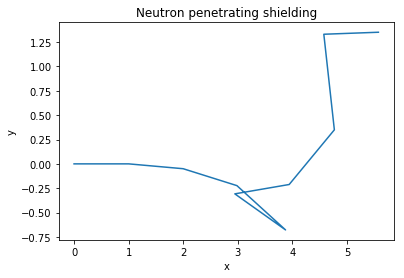

10589 of 100000 neutrons penetrated the wall
That is 10.59 +/- 0.10%


In [50]:
step_length = 1. # the unit distance
num_neutrons = 100000
y_exit_values = []
already_plotted_one_event = False
for ineutron in range(num_neutrons):
    x_values = [0.,1.]
    y_values = [0.,0.]
    x = 1.
    y = 0.
    for istep in range(15):
        theta = uniform(-pi, pi)
        x_step = step_length * cos(theta)
        y_step = step_length * sin(theta)
        x += x_step
        y += y_step
        x_values.append(x)
        y_values.append(y)
        if x < 0.:
            # These neutrons have exited the wall, but on the "wrong" side!
            break
        elif x > 5.:
            y_exit_values.append(y)
            if not already_plotted_one_event:
                plt.plot(x_values, y_values)
                plt.title('Neutron penetrating shielding')
                plt.xlabel('x')
                plt.ylabel('y')
                plt.show()
                already_plotted_one_event = True
            break
print("%d of %d neutrons penetrated the wall" % (len(y_exit_values), num_neutrons))
print("That is %.2f +/- %.2f%%" % (len(y_exit_values)/num_neutrons*100., sqrt(len(y_exit_values))/num_neutrons*100.))

## (b) Sample Path of Penetrating Neutron

The plot is shown above.  This is the path of the first neutron to penetrate the wall at $x=5$ units.

## (c) Exit Coordinate

All neutrons exit at $x=5$, but the $y$ coordinates of their exits can vary.  
The histogram of $y$ exit coordinates shows that they are symmetric about 0.
This is because the probability for scattering is symmetric about $\theta=0$.

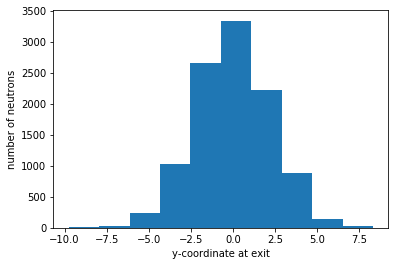

In [52]:
plt.hist(y_exit_values)
plt.xlabel('y-coordinate at exit')
plt.ylabel('number of neutrons')
plt.show()

# Problem 4

We will use the Metropolis method to generate points in a Gaussian distribution ($w(x) = \frac{1}{\sqrt{2\pi}} e^{-x^2/2}$) via a random walk, then use those points to integrate a function.

First, we implement the Metropolis random walk:

In [53]:
import numpy as np
import random

# Taking a random walk inside the Metropolis algorithm

def w(x):
    return 1./np.sqrt(2*pi)*exp(-pow(x,2)/2.)

def metropolis(N, x0, w, delta):
    # x0 is the starting point for the random walk
    n_attempts = 0
    n_accepted = 0
    points = zeros(N)
    x = x0
    while n_accepted < N:
        n_attempts += 1
        x_trial = x + delta*random.uniform(-1., 1.)
        r = w(x_trial)/w(x)
        if r > random.random():
            # Step accepted
            points[n_accepted] = x_trial
            x = x_trial
            n_accepted += 1
    return (points, n_attempts)

Now check that the array of points seems to follow the Gaussian distribution with mean 0 and sigma 1.

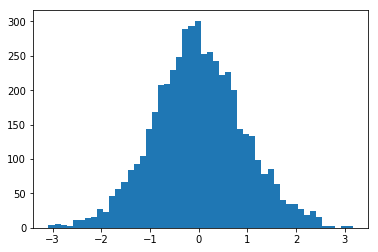

In [54]:
(gaussian_points, n_attempts) = metropolis(5000, 0., w, 1.0)
plt.hist(gaussian_points, bins=50)
plt.show()

## (a) Exploration of step sizes

If the step size is too large, the acceptance ratio will be small.
If the step size is too small, the acceptance ratio will be large, but the correlation between points will be too high, and the points will not cover the interval very well.

The nearest-neighbor correlation functions are
$$C(k) = \frac{1}{N} \sum_{i=1}^{N} x_{i}\ x_{i+k}, \quad (k = 1, 2,
\ldots)$$

In [55]:
def C(k, array_of_points):
    sum = 0.
    N = len(array_of_points)
    for i in range(N-k):
        sum += array_of_points[i]*array_of_points[i+k]
    return sum/(N-k)

We expect random points to be uncorrelated.  For an interval centered at 0, we should see $C(k) = 0$.  (For an interval [0,1], we should see $C(k)=1/4$.)  Let's double-check this expectation with a sequence of pseudo-random numbers.

In [61]:
random_array = np.random.uniform(-1, 1, 5000)
for i in (1,2,3):
    print("C(%d) = %f" % (i, C(i,random_array)))

C(1) = 0.005725
C(2) = 0.008269
C(3) = 0.000902


These seem to be pretty close to 0, as expected.

Now we are in position to calculate the results for different step sizes `delta`: 0.1, 1.0, 2.0, 3.0, 5.0, 10.0.
We'll plot histograms of the points, too, so that we can check they are still Gaussian.

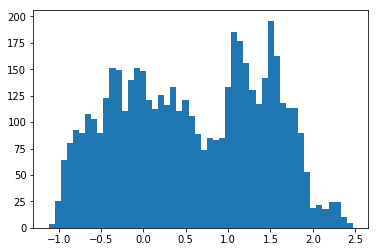

For delta = 0.100
C(1) = 1.057607
C(2) = 1.056101
C(3) = 1.054552
Fraction of trials accepted is 0.9768


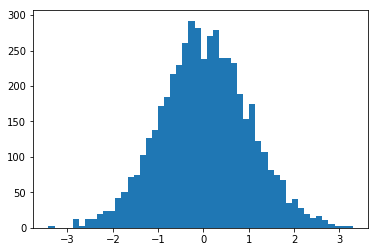

For delta = 1.000
C(1) = 0.823959
C(2) = 0.697619
C(3) = 0.587964
Fraction of trials accepted is 0.8013


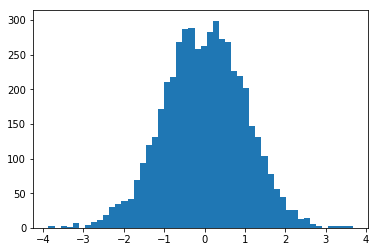

For delta = 2.000
C(1) = 0.530366
C(2) = 0.311480
C(3) = 0.171575
Fraction of trials accepted is 0.6234


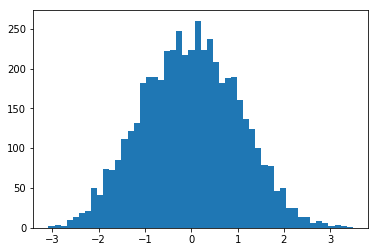

For delta = 3.000
C(1) = 0.242320
C(2) = 0.096165
C(3) = -0.000885
Fraction of trials accepted is 0.4941


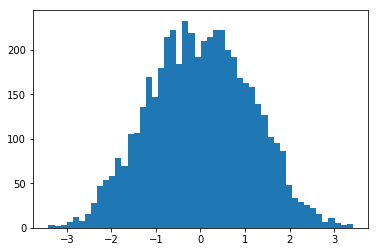

For delta = 5.000
C(1) = 0.019898
C(2) = -0.050632
C(3) = -0.022642
Fraction of trials accepted is 0.3179


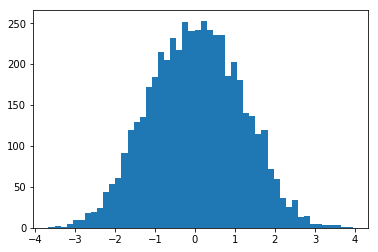

For delta = 10.000
C(1) = -0.023129
C(2) = -0.000285
C(3) = -0.026625
Fraction of trials accepted is 0.1579


In [62]:
N = 5000
for delta in (0.1, 1.0, 2.0, 3.0, 5.0, 10.0):
    (m_points, n_attempts) = metropolis(N, 0., w, delta)
    plt.hist(m_points, bins=50)
    plt.show() 
    
    print("For delta = %.3f" % delta)
    for i in (1,2,3):
        print("C(%d) = %f" % (i, C(i,m_points)))
    
    print("Fraction of trials accepted is %.4f" % (N/n_attempts))

We see that the correlations get smaller and smaller as `delta` increases.
For very small `delta`=0.1, the neighboring points ($k=1$) are correlated because the step does not carry the walk very far from the previous point.  This makes the histogram look lumpy, not at all like a Gaussian.  The next-to-neighboring points are slightly less correlated, because the walk has taken two steps in between them.

For `delta`=10.0, the points are completely uncorrelated, but the acceptance ratio is very small.

We will use the rule of thumb and pick `delta`=3.0, which gives an acceptance ratio of about 50%.
(This is roughly the "size" of the Gaussian distribution: full width at half maximum is 2.4.)

## (b) Integrate $\int_{-\infty}^{\infty} x^2 e^{-x^2/2} \, dx$

Since our points were distributed according to $w(x) = \frac{1}{\sqrt{2\pi}} e^{-x^2/2}$, our integrand will be $f(x)/w(x) = \sqrt{2\pi} x^2$.

Note that the weighting function $w(x)$ is already normalized.

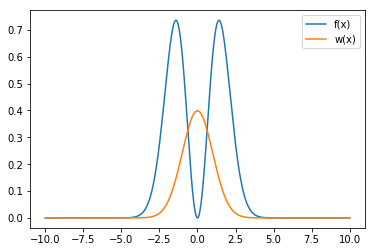

Generated  10000  points in  20268  trial step attempts
Result is  2.7836664173008927


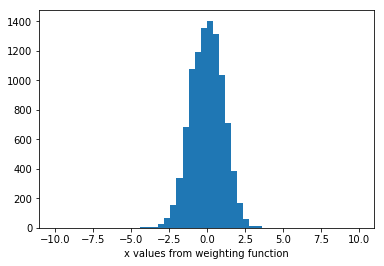

In [98]:
def f(x):
    return pow(x,2)*exp(-pow(x,2)/2.)

def w(x):
    return 1./np.sqrt(2*pi)*exp(-pow(x,2)/2.)

x_values = linspace(-10., 10., 1000)
plt.plot(x_values, f(x_values), label='f(x)')
plt.plot(x_values, w(x_values), label='w(x)')
plt.legend()
plt.show()

N = 10000
delta = 3.0
(x_values, n_attempts) = metropolis(N, 0., w, delta)
print("Generated ", N, " points in ", n_attempts, " trial step attempts")
sum = 0.
for x in x_values:
    sum += f(x)/w(x)

print("Result is ", sum/N)

plt.hist(x_values, bins=50, range=(-10,10))
plt.xlabel("x values from weighting function")
plt.show()


The exact result is $\sqrt{2\pi}=2.5066$.

What is happening here -- why don't we get something approaching the exact result?  The fact is that this weighting function is a terrible choice after all.  The random walk does not make it out to the $x$ values where $f(x)$ is large.  We need to make the weighting function Gaussian wider to capture the function values at large $|x|$.

# Problem 5

We follow the setup of the ferromagnetic 1-D Ising model as outlined in Landau Chapter 17.4.1:
* Exchange energy $J=+1.0$ (ferromagnetic)
* periodic boundary condition
* "cold start" (aligned) or "hot start" (random)
* $10N$ rearrangements, where $N$ is the number of spin sites
* $kT=1$ for debugging
* $B=0.05$ so that we can compare to the analytic prediction for the magnetization

The internal energy is the average value of the energy

$$U = \langle E \rangle \\
E = -J \sum_{i=1}^{N-1} s_i s_{i+1}
$$

and the magnetization is the sum of spins

$$\mathcal{M} = \sum_{i=1}^N s_i$$

We expect that $\mathcal{M}=0$ for large $T$, and $\mathcal{M}=N$ for small $T$ (when all spins are aligned).
(Note that $\mathcal{M}$ is not $N/2$ as stated in the book because we are not setting the spins = 1/2 but rather to 1.  This is not quite correct, but it allows us to compare to the figures in the text.)

## (a) Single run with $N=100$

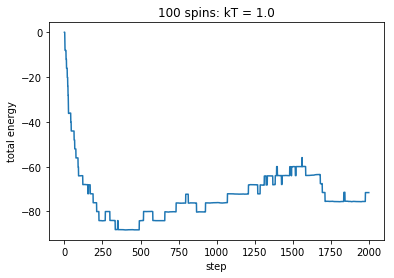

Internal (average) energy is -0.71571
Total absolute magnetization is 26.0


In [137]:
import numpy as np
import random

# Ising model implementation with Metropolis algorithm
# Based on IsingViz.py from Landau, et al.

N     = 100                 # number of spin sites                                     
B     = 0.05                 # magnetic field                               
mu    = .33                # g mu (not needed if B=0)
J     = 1.                 # exchange energy                              
k     = 1.                 # Boltzmann constant
T     = 1.                 # temperature                                 
seed() 
print_state = False
start = "hot"

def initialize_spins(N, start):
    state = [0]*N                # spin states: up(1), down (-1)
    for i in range(0 ,N):  
        if start == "cold":
            state[i] = -1.          # Initial spins all down (cold start)  
        elif start == "hot":
            r = random.random()
            if r < 0.5:             # Initial spins all random (hot start)
                state[i] = -1.
            else:
                state[i] = +1.
    return state

def energy(S):                                  
    FirstTerm = 0.
    SecondTerm = 0.                                          
    for i in range(0,N-1):  
        FirstTerm += -J * S[i]*S[i+1]
    FirstTerm += -J * S[N-1]*S[0]     # periodic boundary 
    for i in range(0,N):
        SecondTerm += -mu*S[i]*B
    return (FirstTerm + SecondTerm)

def magnetization(S):
    sum = 0
    for s in S:
        sum += s
    return sum

state = initialize_spins(N, start)
ES = energy(state)

num_steps = 20*N
energy_values = []
step_index_values = []
for istep in range(num_steps):
    test_state = list(state)
    random_site = np.random.randint(N)
    test_state[random_site] *= -1.   # Trial step: flip spin at one random site
    ET = energy(test_state)
    R = exp((ES-ET)/(k*T))           # Boltzmann test
    #print(ES, ET)
    if R > random.random():
        state = test_state
        ES = ET
    # else we remain in the same state as before

    energy_values.append(ES)
    step_index_values.append(istep)

    if print_state:
        row = ''
        for site in state:
            if site==1.0:
                row += 'X'
            else:
                row += '\x1b[31mO\x1b[0m'
        print(row)
    
plt.plot(step_index_values, energy_values)
plt.xlabel('step')
plt.ylabel('total energy')
plt.title('%d spins: kT = %.1f' % (N, k*T))
plt.show()

print("Internal (average) energy is", energy_values[-1]/N)
print("Total absolute magnetization is", abs(magnetization(state)))

Of course the result can change from run to run.

In order to smooth out the fluctuations from the steps, we can average over the last part of the evolution.  Since we will want to ignore the early steps, before the system comes to equilibrium, we'll increase the number of steps and just look at the second half of the system evolution.

## (b) Behavior as Function of $kT$

Here we scan over $kT$ values and average over the second half of the system evolution to find an average value for each $kT$.

We actually plot the average magnetization (total magnetization/N) so that we can compare to Fig. 17.3.
We really have to start from a "cold" start, or else the magnetization will always be 0.

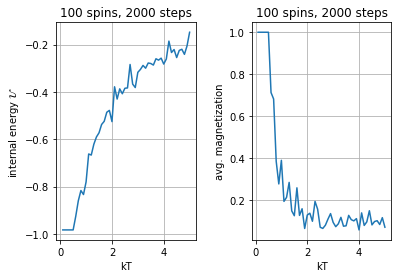

In [140]:
start = "cold"
J = 1.
kT_values = []
final_avg_energy_values = []
final_avg_magnetization_values = []
for T in linspace(0.1, 5., 50):
    state = initialize_spins(N, start)
    
    ES = energy(state)

    num_steps = 20*N
    energy_values = []
    magnetization_values = []
    step_index_values = []
    for istep in range(num_steps):
        test_state = list(state)
        random_site = int(N*random.random())
        test_state[random_site] *= -1.   # Trial step: flip spin at one random site
        ET = energy(test_state)
        R = exp((ES-ET)/(k*T))           # Boltzmann test
        #print(ES, ET, k*T, R)
        if R > random.random():
            state = test_state
            ES = ET
        # else we remain in the same state as before

        energy_values.append(ES)
        magnetization_values.append(abs(magnetization(state)))
        step_index_values.append(istep)

    kT_values.append(k*T)
    final_avg_energy_values.append(np.array(energy_values[10*N:]).mean()/N)
    final_avg_magnetization_values.append(np.array(magnetization_values[10*N:]).mean()/N)

figure(1)  
subplot(1,2,1)                    # 1st subplot in figure
plot(kT_values, final_avg_energy_values)
xlabel('kT')
ylabel('internal energy $\mathcal{U}$')
grid(True)                        
title("%d spins, %d steps" % (N, num_steps))
subplot(1,2,2)
plot(kT_values, final_avg_magnetization_values)
xlabel('kT')                       # Axes labels
ylabel('avg. magnetization')
grid(True)  
title("%d spins, %d steps" % (N, num_steps))
subplots_adjust(wspace=0.4)
show()

These results have exactly the same behavior as Fig. 17.3, but they are much less smooth.  One way to smooth them out would be to run for more steps and average over a larger number of steps.

We do see that there is a transition when the magnetization drops sharply at some characteristic $kT$ value.

It is interesting that Fig. 17.3(a) in the text shows the energy as always greater than 0.  As we will see below, this is not consistent with the analytic solution in Eqn. 17.7.

## (c)

The analytic result for the average internal energy is (Landau Eqn. 17.7):

$$\mathcal{U} = -J N \tanh\frac{J}{kT}$$

The analytic result for the magnetization is (Landau Eqn. 17.9):

$$
\mathcal{M} = \frac{N e^{J/kT} \sinh(B/kT)}
{\sqrt{e^{2J/kT} \sinh^2 (B/kT) + e^{-2J/kT}}}
$$

To perform the calculation with a larger number of spins ($N=2000$ instead of $N=100$), we'll need to clean up the energy calculation.
There is no need to recalculate the energy each time by summing over the complete state.
We just have to calculate the energy difference due to a trial spin flip.
This can be done by looking at the nearest neighbors only.
If you write down all of the possibilities, you'll see that the change is 0 when the spins to the left and right of the trial flip position have opposite directions.
The change is large when the left and right spins are in the same direction; then a change in the center spin results in a new change in the spin-spin energies.

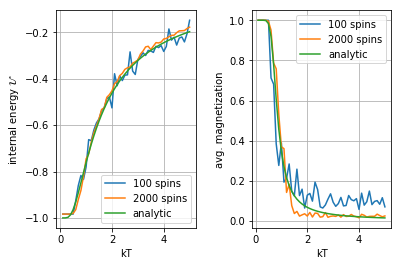

In [142]:
def U(N, T):
    return (J * -N * tanh(J/(k*T)))

def M(N, T):
    num = N * exp(J/(k*T)) * sinh(B/(k*T))
    denom = sqrt(exp(2*J/(k*T)) * pow(sinh(B/(k*T)),2) + exp(-2*J/(k*T)))
    return num/denom

def energy_change(state, flip_location):
    # Assumes that the trial step is to flip the spin at flip_location
    # Needs to account for periodic boundary conditions
    # These are _current_ spins, not the trial spin
    N = len(state)
    if flip_location > 0:
        spin_left = state[flip_location-1]
    else:
        spin_left = state[N-1]
    if flip_location < N-1:
        spin_right = state[flip_location+1]
    else:
        spin_right = state[0]
    change = 2 * J * state[flip_location] * (spin_left+spin_right)
    return change

N = 2000
start = "cold"
kT_values = []
analytic_U_values = []
analytic_M_values = []
final_avg_energy_values_2k = []
final_avg_magnetization_values_2k = []
for T in linspace(0.1, 5., 50):
    state = initialize_spins(N, start)
    
    ES = energy(state)
    magS = magnetization(state)

    num_steps = 20*N
    energy_values = []
    magnetization_values = []
    step_index_values = []
    for istep in range(num_steps):
        test_state = list(state)
        random_site = np.random.randint(N)
        deltaE = energy_change(state, random_site)   # Trial step: flip spin at one random site
        R = exp(-deltaE/(k*T))           # Boltzmann test
        #print(ES, ET, k*T, R)
        if R > random.random():
            test_state[random_site] *= -1.
            state = test_state
            ES += deltaE
        # else we remain in the same state as before

        energy_values.append(ES)
        magnetization_values.append(abs(magnetization(state)))
        step_index_values.append(istep)

    kT_values.append(k*T)
    analytic_U_values.append(U(N,T)/N)
    analytic_M_values.append(M(N,T)/N)
    final_avg_energy_values_2k.append(np.array(energy_values[10*N:]).mean()/N)
    final_avg_magnetization_values_2k.append(np.array(magnetization_values[10*N:]).mean()/N)

figure(1)  
subplot(1,2,1)                    # 1st subplot in figure
plot(kT_values, final_avg_energy_values, label='100 spins')
plot(kT_values, final_avg_energy_values_2k, label='2000 spins')
plot(kT_values, analytic_U_values, label='analytic')
xlabel('kT')
ylabel('internal energy $\mathcal{U}$')
grid(True)
legend()
subplot(1,2,2)
plot(kT_values, final_avg_magnetization_values, label='100 spins')
plot(kT_values, final_avg_magnetization_values_2k, label='2000 spins')
plot(kT_values, analytic_M_values, label='analytic')
xlabel('kT')                       # Axes labels
ylabel('avg. magnetization')
grid(True)  
legend()
subplots_adjust(wspace=0.4)
show()

It's very clear that the agreement with the analytic results is much better for N=2000 than for N=100.
